# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [204]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [205]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


cities_pd = pd.DataFrame(cities)
cities_pd = cities_pd.rename(columns={0: "City"})
cities_pd

,City
0,nishihara
1,vryburg
2,busselton
3,dunedin
4,hulan ergi
...,...
598,satapuala
599,guanica
600,benguela
601,lahan


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [206]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

total_data = cities_pd
total_data['Cloudiness'] = 0
total_data['Country'] = ''
total_data['Date'] = 0
total_data['Humidity'] = 0
total_data['Lat'] = 0
total_data['Lng'] = 0
total_data['Max Temp'] = 0
total_data['Wind Speed'] = 0
params = {}


# Loop through the list of cities and perform a request for data on each
print("--------------------------------------")
print("----- BEGGINING DATA RETRIEVAL -------")
print("--------------------------------------")

for index, row in total_data.iterrows():
        # get city from df
        city = row['City']
    
        # add keyword to params dict
        params['city_name'] = city
    
        # assemble url and make API request
        response = requests.get(query_url + row['City']).json()
    
        try:
            print(f"Processing Record {index} ｜ {city}.")
        
            total_data.loc[index, 'Cloudiness'] = float(response['clouds']['all'])
            total_data.loc[index, 'Country'] = response['sys']['country']
            total_data.loc[index, 'Date'] = float(response['dt'])
            total_data.loc[index, 'Humidity'] = float(response['main']['humidity'])
            total_data.loc[index, 'Lat'] = float(response['coord']['lat'])      
            total_data.loc[index, 'Lng'] = float(response['coord']['lon'])
            total_data.loc[index, 'Max Temp'] = float(response['main']['temp_max'])
            total_data.loc[index, 'Wind Speed'] = float(response['wind']['speed'])
                    
        except (KeyError, IndexError):
            print("Missing field/result... skipping.")
print("--------------------------------------")
print("-------- RETRIVAL COMPLETE -----------")
print("--------------------------------------")

--------------------------------------
----- BEGGINING DATA RETRIEVAL -------
--------------------------------------
Processing Record 0 ｜ nishihara.
Processing Record 1 ｜ vryburg.
Processing Record 2 ｜ busselton.
Processing Record 3 ｜ dunedin.
Processing Record 4 ｜ hulan ergi.
Processing Record 5 ｜ saleaula.
Missing field/result... skipping.
Processing Record 6 ｜ cape town.
Processing Record 7 ｜ padre bernardo.
Missing field/result... skipping.
Processing Record 8 ｜ kapaa.
Processing Record 9 ｜ grand river south east.
Missing field/result... skipping.
Processing Record 10 ｜ ushuaia.
Processing Record 11 ｜ chernenko.
Processing Record 12 ｜ sentyabrskiy.
Missing field/result... skipping.
Processing Record 13 ｜ cabo san lucas.
Processing Record 14 ｜ rikitea.
Processing Record 15 ｜ barrow.
Processing Record 16 ｜ seminole.
Processing Record 17 ｜ roald.
Processing Record 18 ｜ san pedro.
Processing Record 19 ｜ castro.
Processing Record 20 ｜ leninsk.
Processing Record 21 ｜ ninh binh.
Processi

Processing Record 217 ｜ lokosovo.
Processing Record 218 ｜ tiverton.
Processing Record 219 ｜ louisbourg.
Missing field/result... skipping.
Processing Record 220 ｜ ucluelet.
Processing Record 221 ｜ sabang.
Processing Record 222 ｜ samusu.
Missing field/result... skipping.
Processing Record 223 ｜ tuatapere.
Processing Record 224 ｜ christchurch.
Processing Record 225 ｜ arcata.
Processing Record 226 ｜ magadan.
Processing Record 227 ｜ san cristobal.
Processing Record 228 ｜ alofi.
Processing Record 229 ｜ oriximina.
Processing Record 230 ｜ plettenberg bay.
Processing Record 231 ｜ laguna.
Processing Record 232 ｜ kara.
Processing Record 233 ｜ thompson.
Processing Record 234 ｜ bulawayo.
Processing Record 235 ｜ mogadishu.
Processing Record 236 ｜ vostok.
Processing Record 237 ｜ hirara.
Processing Record 238 ｜ sao jose da coroa grande.
Processing Record 239 ｜ amiens.
Processing Record 240 ｜ mesesenii de jos.
Processing Record 241 ｜ yulara.
Processing Record 242 ｜ byron bay.
Processing Record 243 ｜ ma

Processing Record 437 ｜ beyneu.
Processing Record 438 ｜ chuy.
Processing Record 439 ｜ ewa beach.
Processing Record 440 ｜ kibakwe.
Processing Record 441 ｜ alekseyevsk.
Processing Record 442 ｜ san ignacio.
Processing Record 443 ｜ havelock.
Processing Record 444 ｜ indramayu.
Processing Record 445 ｜ pacific grove.
Processing Record 446 ｜ darhan.
Processing Record 447 ｜ coihaique.
Processing Record 448 ｜ gorno-chuyskiy.
Missing field/result... skipping.
Processing Record 449 ｜ kirakira.
Processing Record 450 ｜ lebanon.
Processing Record 451 ｜ kamenka.
Processing Record 452 ｜ mawlaik.
Processing Record 453 ｜ batemans bay.
Processing Record 454 ｜ salinopolis.
Processing Record 455 ｜ santa elena.
Processing Record 456 ｜ alihe.
Processing Record 457 ｜ tongzi.
Processing Record 458 ｜ makakilo city.
Processing Record 459 ｜ kisanga.
Processing Record 460 ｜ kirensk.
Processing Record 461 ｜ muros.
Processing Record 462 ｜ gizo.
Processing Record 463 ｜ glenwood springs.
Processing Record 464 ｜ kruisfo

### Convert Raw Data to DataFrame
* Display the DataFrame

In [207]:
total_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nishihara,75.0,JP,1.569345e+09,88.0,35.74,139.53,75.99,6.93
1,vryburg,0.0,ZA,1.569345e+09,27.0,-26.96,24.73,63.26,11.56
2,busselton,13.0,AU,1.569345e+09,71.0,-33.64,115.35,55.00,16.31
3,dunedin,49.0,NZ,1.569345e+09,74.0,-45.87,170.50,44.01,1.99
4,hulan ergi,0.0,CN,1.569345e+09,50.0,47.20,123.63,50.12,3.89


### Cleaning up data 

In [208]:
# Cleanning Data
# Eliminating values in zero
total_data = total_data[(total_data != 0).all(1)]
# Resetting index
total_data = total_data.reset_index(drop = True) 
total_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nishihara,75.0,JP,1.569345e+09,88.0,35.74,139.53,75.99,6.93
1,busselton,13.0,AU,1.569345e+09,71.0,-33.64,115.35,55.00,16.31
2,dunedin,49.0,NZ,1.569345e+09,74.0,-45.87,170.50,44.01,1.99
3,cape town,20.0,ZA,1.569345e+09,59.0,-33.93,18.42,70.00,18.34
4,kapaa,90.0,US,1.569345e+09,78.0,22.08,-159.32,80.60,11.41
...,...,...,...,...,...,...,...,...,...
450,saint-denis,77.0,FR,1.569345e+09,87.0,48.94,2.36,64.40,16.11
451,satapuala,81.0,WS,1.569345e+09,94.0,-13.84,-171.98,75.00,5.01
452,guanica,66.0,PR,1.569345e+09,76.0,17.97,-66.91,89.01,3.00
453,benguela,75.0,AO,1.569345e+09,100.0,-12.58,13.40,71.60,4.70


### Verifiying if all the columns have the same data

In [209]:
total_data.count()

City          455
Cloudiness    455
Country       455
Date          455
Humidity      455
Lat           455
Lng           455
Max Temp      455
Wind Speed    455
dtype: int64

### Export Data to a CSV File

In [210]:
export_csv = total_data.to_csv (r'Output Data Weather/Cities.csv', index = "City", header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Verify data types to plot

In [211]:
total_data.dtypes

City           object
Cloudiness    float64
Country        object
Date          float64
Humidity      float64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

#### Create a Function to Scatter Plot

In [212]:
def scatter_plot(x_values,y_values, title, x_label, y_label, file_name):
    plt.scatter(x_values,y_values)
    plt.title(title,fontweight="bold");
    plt.xlabel(x_label,fontweight="bold");
    plt.ylabel(y_label,fontweight="bold");
    plt.grid(b=None, which='major', axis='both')
    plt.savefig('Output Data Weather/'+ file_name +'.png')
    plt.show()

#### Latitude vs. Temperature Plot

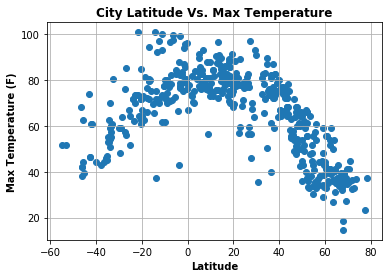

In [213]:
x_values = total_data['Lat']
y_values = total_data['Max Temp']
title = "City Latitude Vs. Max Temperature"
x_label = "Latitude"
y_label = "Max Temperature (F)"
file_name = "Fig.1 - " + title

scatter_plot(x_values,y_values, title, x_label, y_label, file_name)

##### From the scatter plot, it is possible to observe that:
- The closest to the equator (meridian 0), the warmer the city.

#### Latitude vs. Humidity Plot

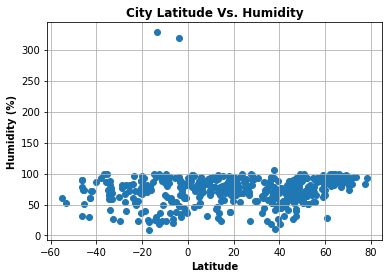

In [214]:
x_values = total_data['Lat']
y_values = total_data['Humidity']
title = "City Latitude Vs. Humidity"
x_label = "Latitude"
y_label = "Humidity (%)"
file_name = "Fig.2 - " + title

scatter_plot(x_values,y_values, title, x_label, y_label, file_name)

#### Latitude vs. Cloudiness Plot

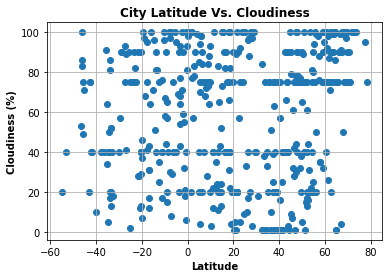

In [215]:
x_values = total_data['Lat']
y_values = total_data['Cloudiness']
title = "City Latitude Vs. Cloudiness"
x_label = "Latitude"
y_label = "Cloudiness (%)"
file_name = "Fig.3 - " + title

scatter_plot(x_values,y_values, title, x_label, y_label, file_name)

#### Latitude vs. Wind Speed Plot

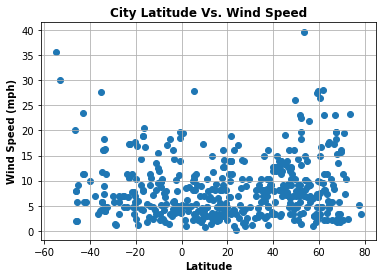

In [216]:
x_values = total_data['Lat']
y_values = total_data['Wind Speed']
title = "City Latitude Vs. Wind Speed"
x_label = "Latitude"
y_label = "Wind Speed (mph)"
file_name = "Fig.4 - " + title

scatter_plot(x_values,y_values, title, x_label, y_label, file_name)

## Linear Regression

### Function to Plot the Linear Regression

In [217]:
# OPTIONAL: Create a function to create Linear Regression plots

def scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, eq_location):
    # Define the Location of the Linear Regression Equation
    if eq_location == 'UpperRight':
        loc_x = x_values.max()
        loc_y = y_values.max()
    elif eq_location == 'LowerRight':
        loc_x = x_values.max() - (x_values.max()-x_values.min())/2
        loc_y = y_values.min() 
    elif eq_location == 'UpperLeft':
        loc_x = x_values.min()
        loc_y = y_values.max() - (y_values.max()-y_values.min())/8
    elif eq_location == 'LowerLeft':
        loc_x = x_values.min()
        loc_y = y_values.min()
    elif eq_location == 'Middle':
        loc_x = (x_values.max()+ x_values.min())/2
        loc_y = (y_values.max()+ y_values.min())/2
    
    # Perform a linear regression on latitude vs. temperature
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    # print(regress_values)

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"firebrick")

    # Label plot and annotate the line equation
    plt.annotate(line_eq,(loc_x,  loc_y),
                 fontsize=15,color="firebrick")   
    plt.title(chart_title ,fontweight="bold");
    plt.xlabel(x_label ,fontweight="bold");
    plt.ylabel(y_label ,fontweight="bold");
    plt.grid(b=None, which='major', axis='both')
    # Save Plot
    plt.savefig('Output Data Weather/'+ file_name +'.png')
    
    # Print r square value
    print(f"The r-squared is: {rvalue}")
    if rvalue < 0:
        print(f'Because the r-squared is negative:{"%0.2f"% (rvalue*100)}%,')
        print(f'the model "{line_eq}" explains the data really poorly.')  
        print(f'The sum of the squared residuals of the regression are lower than')  
        print(f'the sum of the squared residuals of the mean.')
        print(f'In other words, a line built with the mean of "{y_label}",')
        print(f'respresents better the data than the regression model.') 
    else:
        if rvalue < 0.4:
            correlation = 'very low'
        elif rvalue > 0.7:
            correlation = 'strong'
        else:  
            correlation = 'modest'
        
        print(f'In the model {line_eq}: ')
        print(f'{"%0.2f"% (rvalue*100)}% of the variations in "{y_label}"')
        print(f'are explained by variations in "{x_label}".')
        print(f'"{y_label}" and "{x_label}" have a {correlation} correlation.')

    # Show plot
    plt.show()

### Southern Hempisphere Data

In [218]:
# Create Southern Hemisphere DataFrames
total_data_south = total_data.loc[(total_data['Lat'] >= -90) & (total_data['Lat'] <= 0)]
total_data_south

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,busselton,13.0,AU,1.569345e+09,71.0,-33.64,115.35,55.00,16.31
2,dunedin,49.0,NZ,1.569345e+09,74.0,-45.87,170.50,44.01,1.99
3,cape town,20.0,ZA,1.569345e+09,59.0,-33.93,18.42,70.00,18.34
5,ushuaia,20.0,AR,1.569345e+09,61.0,-54.81,-68.31,51.80,35.57
8,rikitea,82.0,PF,1.569345e+09,71.0,-23.12,-134.97,69.74,10.58
...,...,...,...,...,...,...,...,...,...
433,quatre cocos,40.0,MU,1.569345e+09,88.0,-20.21,57.76,71.60,4.70
438,grahamstown,52.0,ZA,1.569345e+09,69.0,-33.31,26.53,60.01,4.00
444,mayumba,43.0,GA,1.569345e+09,89.0,-3.44,10.65,76.94,14.34
451,satapuala,81.0,WS,1.569345e+09,94.0,-13.84,-171.98,75.00,5.01


### Northern Hemisphere Data

In [219]:
# Create Northern Hemisphere DataFrames
total_data_north = total_data.loc[(total_data['Lat'] >= 0) & (total_data['Lat'] <= 90)]
total_data_north

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nishihara,75.0,JP,1.569345e+09,88.0,35.74,139.53,75.99,6.93
4,kapaa,90.0,US,1.569345e+09,78.0,22.08,-159.32,80.60,11.41
6,chernenko,30.0,UA,1.569345e+09,32.0,47.23,37.74,48.68,6.60
7,cabo san lucas,5.0,MX,1.569345e+09,69.0,22.89,-109.91,89.01,16.11
9,seminole,1.0,US,1.569345e+09,61.0,32.72,-102.64,82.40,8.05
...,...,...,...,...,...,...,...,...,...
448,kharabali,44.0,RU,1.569345e+09,42.0,47.41,47.25,47.78,3.33
449,qaqortoq,75.0,GL,1.569345e+09,28.0,60.72,-46.03,55.40,14.99
450,saint-denis,77.0,FR,1.569345e+09,87.0,48.94,2.36,64.40,16.11
452,guanica,66.0,PR,1.569345e+09,76.0,17.97,-66.91,89.01,3.00


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8316857096748966
Because the r-squared is negative:-83.17%,
the model "y = -0.76x + 91.91" explains the data really poorly.
The sum of the squared residuals of the regression are lower than
the sum of the squared residuals of the mean.
In other words, a line built with the mean of "Max Temp (F)",
respresents better the data than the regression model.


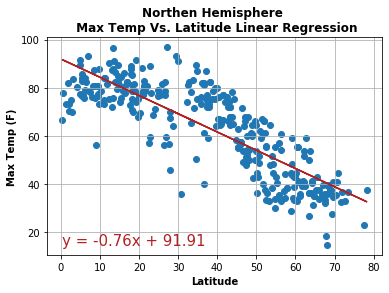

In [220]:
x_values = total_data_north["Lat"]
y_values = total_data_north["Max Temp"]
chart_title = "Northen Hemisphere \n Max Temp Vs. Latitude Linear Regression"
file_name = "Fig.5 - Northen Hemisphere - Max Temp Vs. Linear Regression"
x_label = "Latitude"
y_label = "Max Temp (F)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label,'LowerLeft')

###### From the scatter plot, it is possible to observe that:
- In the Northern Hemisphere the higher the latitude, the lower the temperature.
- In other words, the farther you go to north, the max temperature is going to be lower.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7003626223875447
In the model y = 0.77x + 85.14: 
70.04% of the variations in "Max Temp (F)"
are explained by variations in "Latitude".
"Max Temp (F)" and "Latitude" have a strong correlation.


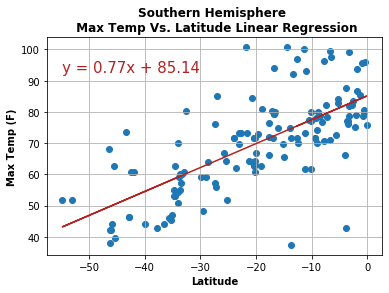

In [221]:
x_values = total_data_south["Lat"]
y_values = total_data_south["Max Temp"]
chart_title = "Southern Hemisphere \n Max Temp Vs. Latitude Linear Regression"
file_name = "Fig.6 - Southern Hemisphere - Max Temp Vs. Linear Regression"
x_label = "Latitude"
y_label = "Max Temp (F)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, 'UpperLeft')

##### From the scatter plot and the regression, it is possible to observe that:
- In the Sourthern Hemisphere the higher the latitude, the higher the temperature.
- In other words, the closest you go to the equator, the max temperature is going to be higher.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1858726080348018
In the model y = 0.16x + 68.07: 
18.59% of the variations in "Humidity(%)"
are explained by variations in "Latitude".
"Humidity(%)" and "Latitude" have a very low correlation.


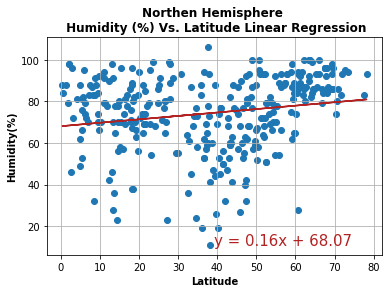

In [222]:
x_values = total_data_north["Lat"]
y_values = total_data_north["Humidity"]
chart_title = "Northen Hemisphere \n Humidity (%) Vs. Latitude Linear Regression"
file_name = "Fig.7 - Northen Hemisphere - Humidity(%) Vs. Linear Regression"
x_label = "Latitude"
y_label = "Humidity(%)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, 'LowerRight')

##### From the scatter plot and the regression, it is possible to observe that:
- For the Northern Hemisphere, there is no relation between the Latitude and the Humidity.
- In other words, for the Northern Hemisphere, Humidity does not depend on the Latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.044348939457148163
In the model y = 0.12x + 72.65: 
4.43% of the variations in "Humidity(%)"
are explained by variations in "Latitude".
"Humidity(%)" and "Latitude" have a very low correlation.


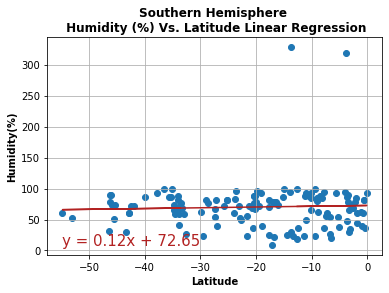

In [223]:
x_values = total_data_south["Lat"]
y_values = total_data_south["Humidity"]
chart_title = "Southern Hemisphere \n Humidity (%) Vs. Latitude Linear Regression"
file_name = "Fig.8 - Southern Hemisphere - Humidity(%) Vs. Linear Regression"
x_label = "Latitude"
y_label = "Humidity(%)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, 'LowerLeft')

##### From the scatter plot and the regression, it is possible to observe that:
- For the Southern Hemisphere, there is no relation between the Latitude and the Humidity.
- In other words, for the Southern Hemisphere, Humidity does not depend on the Latitude.
- There are a couple of points that are off the chart, extremely humid close to the Equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.19020513189406899
In the model y = 0.32x + 45.64: 
19.02% of the variations in "Cloudiness (%)"
are explained by variations in "Latitude".
"Cloudiness (%)" and "Latitude" have a very low correlation.


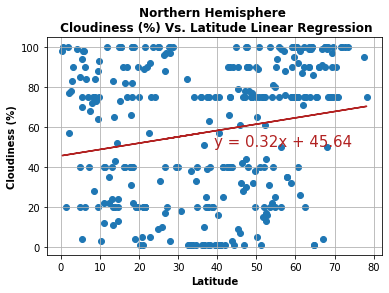

In [224]:
x_values = total_data_north["Lat"]
y_values = total_data_north["Cloudiness"]
chart_title = "Northern Hemisphere \n Cloudiness (%) Vs. Latitude Linear Regression"
file_name = "Fig.9 - Northern Hemisphere - Cloudiness (%) Vs. Linear Regression"
x_label = "Latitude"
y_label = "Cloudiness (%)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, 'Middle')

##### From the scatter plot and the regression, it is possible to observe that:
- For the Northern Hemisphere, there is no relation between the Latitude and the Cloudiness.
- In other words, for the Northern Hemisphere, Cloudiness does not depend on the Latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.10746736415768374
In the model y = 0.22x + 61.17: 
10.75% of the variations in "Cloudiness (%)"
are explained by variations in "Latitude".
"Cloudiness (%)" and "Latitude" have a very low correlation.


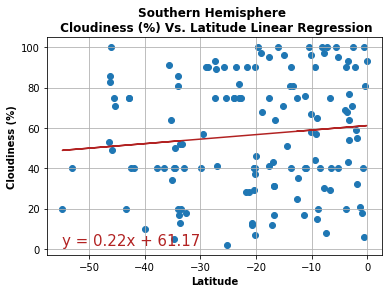

In [225]:
x_values = total_data_south["Lat"]
y_values = total_data_south["Cloudiness"]
chart_title = "Southern Hemisphere \n Cloudiness (%) Vs. Latitude Linear Regression"
file_name = "Fig.10 - Southern Hemisphere - Cloudiness (%) Vs. Linear Regression"
x_label = "Latitude"
y_label = "Cloudiness (%)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, 'LowerLeft')

##### From the scatter plot and the regression, it is possible to observe that:
- For the Southern Hemisphere, there is no relation between the Latitude and the Cloudiness.
- In other words, for the Southern Hemisphere, Cloudiness does not depend on the Latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.21906111356047983
In the model y = 0.06x + 5.93: 
21.91% of the variations in "Wind Speed (mph)"
are explained by variations in "Latitude".
"Wind Speed (mph)" and "Latitude" have a very low correlation.


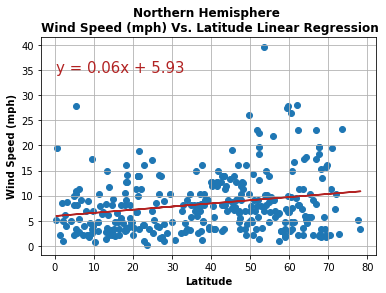

In [226]:
x_values = total_data_north["Lat"]
y_values = total_data_north["Wind Speed"]
chart_title = "Northern Hemisphere \n Wind Speed (mph) Vs. Latitude Linear Regression"
file_name = "Fig.11 - Northern Hemisphere - Wind Speed (mph) Vs. Linear Regression"
x_label = "Latitude"
y_label = "Wind Speed (mph)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, 'UpperLeft')

##### From the scatter plot and the regression, it is possible to observe that:
- For the Northern Hemisphere, there is no relation between the Latitude and the Wind Speed.
- In other words, for the Northern Hemisphere, Wind Speed does not depend on the Latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2119562818773168
Because the r-squared is negative:-21.20%,
the model "y = -0.09x + 6.79" explains the data really poorly.
The sum of the squared residuals of the regression are lower than
the sum of the squared residuals of the mean.
In other words, a line built with the mean of "Wind Speed (mph)",
respresents better the data than the regression model.


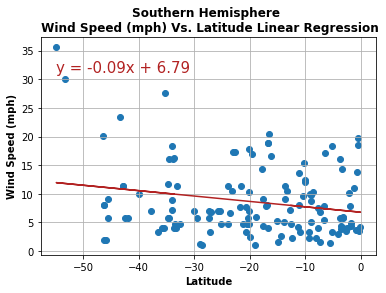

In [227]:
x_values = total_data_south["Lat"]
y_values = total_data_south["Wind Speed"]
chart_title = "Southern Hemisphere \n Wind Speed (mph) Vs. Latitude Linear Regression"
file_name = "Fig.12 - Southern Hemisphere - Wind Speed (mph) Vs. Linear Regression"
x_label = "Latitude"
y_label = "Wind Speed (mph)"

scatter_reg(x_values, y_values, chart_title, file_name, x_label, y_label, 'UpperLeft')

##### From the scatter plot and the regression, it is possible to observe that:
- For the Southern Hemisphere, there is no relation between the Latitude and the Wind Speed.
- In other words, for the Southern Hemisphere, Wind Speed does not depend on the Latitude.